# CSC 555 Project - Predicting Individuals' Income Using Socio-Economic Factors

#### Contribution: Rajeshwari Meenakshi

In [6]:
# All packages are imported.

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Viewing, Assessing and Transforming the Data 

In [7]:
# Read the data into Jupyter. 

adult = pd.read_csv('transformed_data.csv')
target = pd.read_csv('target_data.csv')

In [8]:
# View the first 5 rows of the attributes data.

adult.head()

,age,fnlwgt,education,capital.gain,capital.loss,hours.per.week,native.country,sex_Female,sex_Male,race_Amer-Indian-Eskimo,...,occupation_Transport-moving,occupation_unknown,marital.status_Never-married,marital.status_married,marital.status_single,workclass_never-worked,workclass_private,workclass_public,workclass_unknown,workclass_without-pay
0,90,77053,1,0,4356,40,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
1,82,132870,1,0,4356,18,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,66,186061,1,0,4356,40,1,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,54,140359,0,0,3900,40,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
4,41,264663,1,0,3900,40,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [9]:
# View the first 5 rows of the target data.

target.head()

,income
0,0
1,0
2,0
3,0
4,0


In [10]:
# Determine the number of null values in the dataset. 

adult.isnull().sum()

age                             0
fnlwgt                          0
education                       0
capital.gain                    0
capital.loss                    0
hours.per.week                  0
native.country                  0
sex_Female                      0
sex_Male                        0
race_Amer-Indian-Eskimo         0
race_Asian-Pac-Islander         0
race_Black                      0
race_Other                      0
race_White                      0
relationship_Husband            0
relationship_Not-in-family      0
relationship_Other-relative     0
relationship_Own-child          0
relationship_Unmarried          0
relationship_Wife               0
occupation_Adm-clerical         0
occupation_Armed-Forces         0
occupation_Craft-repair         0
occupation_Exec-managerial      0
occupation_Farming-fishing      0
occupation_Handlers-cleaners    0
occupation_Machine-op-inspct    0
occupation_Other-service        0
occupation_Priv-house-serv      0
occupation_Pro

In [11]:
# Determine the number of null values in the dataset. 

target.isnull().sum()

income    0
dtype: int64

In [12]:
# Get information about the data type of the variables in the data. 

adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           32561 non-null  int64
 1   fnlwgt                        32561 non-null  int64
 2   education                     32561 non-null  int64
 3   capital.gain                  32561 non-null  int64
 4   capital.loss                  32561 non-null  int64
 5   hours.per.week                32561 non-null  int64
 6   native.country                32561 non-null  int64
 7   sex_Female                    32561 non-null  int64
 8   sex_Male                      32561 non-null  int64
 9   race_Amer-Indian-Eskimo       32561 non-null  int64
 10  race_Asian-Pac-Islander       32561 non-null  int64
 11  race_Black                    32561 non-null  int64
 12  race_Other                    32561 non-null  int64
 13  race_White                    3

In [13]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   income  32561 non-null  int64
dtypes: int64(1)
memory usage: 254.5 KB


In [14]:
# Get the uniques values in the native country variable. 

adult['native.country'].unique()

array([1, 0, 2, 3, 4], dtype=int64)

In [15]:
# Obtain the number of entries with each value. 

adult['native.country'].value_counts()

1    29853
2     1223
0      583
4      518
3      384
Name: native.country, dtype: int64

## Training and Testing Split

In [16]:
# The features data set is standardized. 

standard = StandardScaler()
X_standard = standard.fit_transform(adult)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# The dataset is split into 80 percent training and 20 percent test set. 

X_train, X_test, y_train, y_test = train_test_split(X_standard, target, test_size=0.20, random_state=0,stratify=target)

## Decision Tree Model

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [91]:
# Using th Decision Tree model fit the training set. 

clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [92]:
# Predict the target variable of the training set using the features of the training set and calculate the accuracy score. 

prediction = clf_tree.predict(X_train)
balanced_accuracy_score(y_train, prediction)

0.9997608799617408

In [93]:
# Predict the target variable of the test set using the features of the test set and calculate the accuracy score.

prediction = clf_tree.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = prediction)

0.8120681713496085

In [94]:
# Form a confusion matrix with the actal target value of the test set and the prediction. 

confusion_matrix_new = confusion_matrix(y_test, prediction)
print(confusion_matrix_new)

[[4321  624]
 [ 600  968]]


In [95]:
# Print the classification report with the error analysis. 

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4945
           1       0.61      0.62      0.61      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.74      6513
weighted avg       0.81      0.81      0.81      6513



In [96]:
# Calculate Specificity

TN = 968
FP = 624
Specificity = TN/(TN+FP)
print(Specificity)

0.6080402010050251


In [97]:
# Calculate balanced accuracy 

b_accuracy = balanced_accuracy_score(y_test, prediction)
print(b_accuracy)

0.7455794350095953


## Hypertuning Parameters and Improving the Decision Tree Model

In [26]:
# Tuning the hyperparameters, min_samples_split, max_depth and min_samples_leaf with gridsearch. 

tuned = DecisionTreeClassifier()
parameters = {'min_samples_split': [100, 150, 200, 250, 300], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_leaf': [2,3,4,5,6]}
grid_cv_improved = GridSearchCV(estimator = tuned, param_grid = parameters, cv = 10)

In [25]:
# Fitting it to the training set. 

grid_cv_improved.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                     

In [26]:
# Getting the parameters of the best estimator. 

grid_cv_improved.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [100]:
# Using those parameters, fit them to the training set and predict the target variable in the test set. 

best_DT = DecisionTreeClassifier(max_depth = 10, min_samples_split = 150, min_samples_leaf = 6)
best_fit_DT = best_DT.fit(X_train, y_train)

In [101]:
prediction = best_DT.predict(X_train)
balanced_accuracy_score(y_train, prediction)

0.7686964279920185

In [102]:
prediction = best_DT.predict(X_test)

In [103]:
# Obtain a confusion matrix. 

confusion_matrix_best = confusion_matrix(y_test, prediction)
print(confusion_matrix_best)

[[4654  291]
 [ 659  909]]


In [104]:
# Calculate the error analysis. 

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4945
           1       0.76      0.58      0.66      1568

    accuracy                           0.85      6513
   macro avg       0.82      0.76      0.78      6513
weighted avg       0.85      0.85      0.85      6513



In [105]:
# Obtain the balanced accuracy. 

b_accuracy = balanced_accuracy_score(y_test, prediction)
print(b_accuracy)

0.7604360336146592


In [106]:
# Get the accuracy score. 

from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction, normalize = True)

0.8541378780899739

In [107]:
# Obtain the specificity. 

TN = 909
FP = 291
Specificity = TN/(TN+FP)
print(Specificity)

0.7575


### Attempt Number Two

In [37]:
# Increase the accuracy by adding a greater range of values in the grid search. 

tuned = DecisionTreeClassifier()
parameters = {'min_samples_split': [200, 250, 300, 350, 400], 'max_depth': [10, 12, 14, 16, 18], 'min_samples_leaf': [3,5,7,9,11]}
grid_cv_improved = GridSearchCV(estimator = tuned, param_grid = parameters, cv = 10)

In [34]:
# Fit this improved model to the training set. 

grid_cv_improved.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [10, 12, 14, 16, 18],
                 

In [35]:
# Get the parameters that will make the best estimator. 

grid_cv_improved.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=350,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [108]:
# Create a model the these parameter values, fit them to the training set and predict the target variable in the test set. 

best_DT = DecisionTreeClassifier(max_depth = 18, min_samples_split = 350, min_samples_leaf = 9)
best_fit_DT = best_DT.fit(X_train, y_train)

In [109]:
prediction = best_DT.predict(X_train)
balanced_accuracy_score(y_train, prediction)

0.7733733620075846

In [110]:
prediction = best_DT.predict(X_test)

In [111]:
# Obtain the confusion matrix. 

confusion_matrix_best = confusion_matrix(y_test, prediction)
print(confusion_matrix_best)

[[4638  307]
 [ 630  938]]


In [112]:
# Get the classification report and the error analysis values. 

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4945
           1       0.75      0.60      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [113]:
# Get the balanced accuracy. 

b_accuracy = balanced_accuracy_score(y_test, prediction)
print(b_accuracy)

0.7680656868409649


In [114]:
# Get the accuracy score. 

from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction, normalize = True)

0.8561338860740059

In [115]:
# Obtain the value for specificity. 

TN = 938
FP = 307
Specificity = TN/(TN+FP)
print(Specificity)

0.7534136546184739


### Attempt Number Three

In [47]:
# Use a different range of values for the parameters and use grid search. 

tuned = DecisionTreeClassifier()
parameters = {'min_samples_split': [300, 350, 400, 450, 500], 'max_depth': [18, 20, 22, 24, 26], 'min_samples_leaf': [1,2,3, 4,5]}
grid_cv_improved = GridSearchCV(estimator = tuned, param_grid = parameters, cv = 10)

In [43]:
# Fit to the training set. 

grid_cv_improved.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [18, 20, 22, 24, 26],
                 

In [44]:
# Obtain the best estimator. 

grid_cv_improved.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=350,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [116]:
# Using the model with the parameters of the best estimator, fit the model to the training set and predict the target variable of the training set. 

best_DT = DecisionTreeClassifier(max_depth = 24, min_samples_split = 350, min_samples_leaf = 5)
best_fit_DT = best_DT.fit(X_train, y_train)
prediction_train = best_DT.predict(X_train)
acc_train = balanced_accuracy_score(y_train, prediction_train)
acc_train

0.7802705230592129

In [117]:
# Predict the target variable of the test set. 

prediction = best_DT.predict(X_test)

In [118]:
importance = best_DT.feature_importances_
from matplotlib import pyplot

In [119]:
importance = sorted(importance, reverse = True)

In [120]:
# Feature importances of the best model was assessed. 

for i,v in zip(adult.columns, importance):
    print ('feature: %s, importance: %.5f'%(i,v))

feature: age, importance: 0.38669
feature: fnlwgt, importance: 0.21619
feature: education, importance: 0.20424
feature: capital.gain, importance: 0.04909
feature: capital.loss, importance: 0.04741
feature: hours.per.week, importance: 0.03676
feature: native.country, importance: 0.00976
feature: sex_Female, importance: 0.00889
feature: sex_Male, importance: 0.00850
feature: race_Amer-Indian-Eskimo, importance: 0.00652
feature: race_Asian-Pac-Islander, importance: 0.00479
feature: race_Black, importance: 0.00420
feature: race_Other, importance: 0.00357
feature: race_White, importance: 0.00279
feature: relationship_Husband, importance: 0.00190
feature: relationship_Not-in-family, importance: 0.00138
feature: relationship_Other-relative, importance: 0.00085
feature: relationship_Own-child, importance: 0.00085
feature: relationship_Unmarried, importance: 0.00084
feature: relationship_Wife, importance: 0.00082
feature: occupation_Adm-clerical, importance: 0.00071
feature: occupation_Armed-Fo

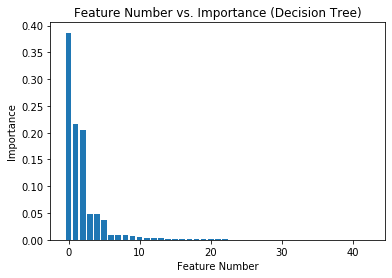

In [121]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('Feature Number vs. Importance (Decision Tree)')
pyplot.xlabel('Feature Number')
pyplot.ylabel('Importance')
pyplot.show()

In [122]:
# Get the confusion matrix. 

confusion_matrix_best = confusion_matrix(y_test, prediction)
print(confusion_matrix_best)

[[4617  328]
 [ 610  958]]


In [123]:
# Get the classification report with the error analysis. 

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.74      0.61      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [124]:
# Get the balanced accuracy. 

b_accuracy = balanced_accuracy_score(y_test, prediction)
print(b_accuracy)

0.772319880935185


In [125]:
# Get the accuracy score. 

from sklearn.metrics import accuracy_score
accuracy_score(y_test, prediction, normalize = True)

0.855980346998311

In [126]:
# Get the specificity. 

TN = 958
FP = 328
Specificity = TN/(TN+FP)
print(Specificity)

0.744945567651633


## Random Forest Model

In [59]:
# Create the random forest classifier. 

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [60]:
# Fit the model to the training set.

RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
# Feature importances of the best model was assessed. 

importance = RF.feature_importances_
importance = sorted(importance, reverse = True)

In [62]:
for i,v in zip(adult.columns, importance):
    print ('feature: %s, importance: %.5f'%(i,v))

feature: age, importance: 0.19313
feature: fnlwgt, importance: 0.16456
feature: education, importance: 0.10687
feature: capital.gain, importance: 0.09885
feature: capital.loss, importance: 0.08885
feature: hours.per.week, importance: 0.06777
feature: native.country, importance: 0.04610
feature: sex_Female, importance: 0.03412
feature: sex_Male, importance: 0.02374
feature: race_Amer-Indian-Eskimo, importance: 0.01625
feature: race_Asian-Pac-Islander, importance: 0.01617
feature: race_Black, importance: 0.01178
feature: race_Other, importance: 0.00971
feature: race_White, importance: 0.00838
feature: relationship_Husband, importance: 0.00752
feature: relationship_Not-in-family, importance: 0.00735
feature: relationship_Other-relative, importance: 0.00720
feature: relationship_Own-child, importance: 0.00651
feature: relationship_Unmarried, importance: 0.00636
feature: relationship_Wife, importance: 0.00632
feature: occupation_Adm-clerical, importance: 0.00630
feature: occupation_Armed-Fo

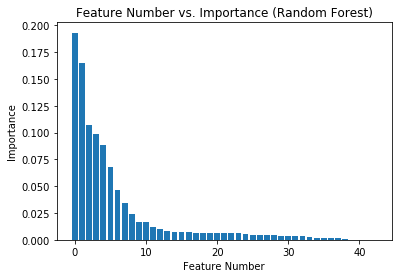

In [63]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.title('Feature Number vs. Importance (Random Forest)')
pyplot.xlabel('Feature Number')
pyplot.ylabel('Importance')
pyplot.show()

In [64]:
# Predict the target value in the training set with the feature variables and calculate the accuracy score. 

prediction = RF.predict(X_train)
balanced_accuracy_score(y_train, prediction)

0.9996014666029014

In [65]:
# Predict the target value in the test set with the feature variables in the test set and calculate the accuracy score. 

prediction = RF.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = prediction)

0.8522954091816367

In [66]:
# Get the confusion matrix. 

confusion_matrix_new = confusion_matrix(y_test, prediction)
print(confusion_matrix_new)

[[4564  381]
 [ 581  987]]


In [67]:
# Obtain the error analysis and the classification report. 

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4945
           1       0.72      0.63      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [68]:
# Get the specificity value. 

TN = 987
FP = 391
Specificity = TN/(TN+FP)
print(Specificity)

0.716255442670537


In [69]:
# Obtain the balanced accuracy. 

b_accuracy = balanced_accuracy_score(y_test, prediction)
print(b_accuracy)

0.7762083814820164


### Improving the Random Forest Model

In [70]:
# Improve and increase the accuracy by searching through parameter values using grid search. 

RF_best = RandomForestClassifier()
parameters_best = {'min_samples_split': [10, 50, 100], 'max_depth': [4, 8, 12], 'n_estimators': [100, 150, 200]}
grid_cv_best = GridSearchCV(estimator = RF_best, param_grid = parameters_best, cv = 10)

In [63]:
# Fit to the training set. 

grid_cv_best.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [64]:
# Get the parameter values for the best estimator. 

grid_cv_best.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [133]:
# Create the model with these values, fit the model to the training set and predict the target variable in the test set and calculate the accuracy score. 

best_model_RF = RandomForestClassifier(max_depth = 12, n_estimators = 150, min_samples_split = 10, min_samples_leaf = 1)
clf_model_fit = best_model_RF.fit(X_train, y_train)
prediction_best_model = best_model_RF.predict(X_train)
balanced_accuracy_score(y_train, prediction_best_model)

0.7737547448650659

In [134]:
prediction_best_model = best_model_RF.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = prediction_best_model)

0.8593582066635959

In [135]:
# Print the confusion matrix. 

confusion_matrix_new = confusion_matrix(y_test, prediction_best_model)
print(confusion_matrix_new)

[[4729  216]
 [ 700  868]]


In [136]:
# Print the classification report with the error analysis. 

print(classification_report(y_test, prediction_best_model))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4945
           1       0.80      0.55      0.65      1568

    accuracy                           0.86      6513
   macro avg       0.84      0.75      0.78      6513
weighted avg       0.85      0.86      0.85      6513



In [137]:
# Get the specificity value. 

TN = 868
FP = 216
Specificity = TN/(TN+FP)
print(Specificity)

0.8007380073800738


In [138]:
# Get the balanced accuracy. 

b_accuracy = balanced_accuracy_score(y_test, prediction_best_model)
print(b_accuracy)

0.7549454716163513


### Attempt Number Two

In [78]:
# Change the range of parameter values and grid search through them. 

RF_best2 = RandomForestClassifier()
parameters_best2 = {'min_samples_split': [10, 50, 100], 'max_depth': [4, 8, 12], 'n_estimators': [100, 150, 200], 'min_samples_leaf': [2, 4, 6] }
grid_cv_best2 = GridSearchCV(estimator = RF_best2, param_grid = parameters_best2, cv = 10)

In [71]:
# Fit the model to the training set. 

grid_cv_best2.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [72]:
# Get the parameter values that are the best estimators. 

grid_cv_best2.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
# Create a model with these parameter values, fit them to the training set, predict the target variable from the test set and get the accuracy score. 

best_model_RF2 = RandomForestClassifier(max_depth = 12, n_estimators = 200, min_samples_split = 10, min_samples_leaf = 2)
clf_model_fit2 = best_model_RF2.fit(X_train, y_train)
prediction_best_model2 = best_model_RF2.predict(X_train)
balanced_accuracy_score(y_true = y_train, y_pred = prediction_best_model2)

0.7685793528865608

In [140]:
prediction_best_model2 = best_model_RF2.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = prediction_best_model2)

0.8598188238906802

In [141]:
# Print the confusion matrix. 

confusion_matrix_new = confusion_matrix(y_test, prediction_best_model2)
print(confusion_matrix_new)

[[4733  212]
 [ 701  867]]


In [142]:
# Print the classification report with the error analysis. 

print(classification_report(y_test, prediction_best_model2))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4945
           1       0.80      0.55      0.66      1568

    accuracy                           0.86      6513
   macro avg       0.84      0.76      0.78      6513
weighted avg       0.85      0.86      0.85      6513



In [143]:
# Get the specificity value. 

TN = 867
FP = 212
Specificity = TN/(TN+FP)
print(Specificity)

0.8035217794253939


In [144]:
# Get the balanced accuracy. 

b_accuracy = balanced_accuracy_score(y_test, prediction_best_model2)
print(b_accuracy)

0.7550310430036524


### Attempt Number Three

In [80]:
# Expand the range of parameter values again and add another parameter min_samples_leaf. 

RF_best3 = RandomForestClassifier()
parameters_best3 = {'min_samples_split': [125, 150, 175], 'max_depth': [6, 12, 18], 'n_estimators': [50, 100, 150], 'min_samples_leaf': [2, 4, 6] }
grid_cv_best3 = GridSearchCV(estimator = RF_best3, param_grid = parameters_best3, cv = 10)

In [81]:
# Fit to the training set. 

grid_cv_best3.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [82]:
# Get the parameter values that are the best estimator. 

grid_cv_best3.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=125,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
# Create the model with the best parameter values. 

best_model_RF3 = RandomForestClassifier(max_depth = 18, n_estimators = 150, min_samples_split = 125, min_samples_leaf = 2)
clf_model_fit3 = best_model_RF3.fit(X_train, y_train)
prediction_best_model3 = best_model_RF3.predict(X_train)
balanced_accuracy_score(y_train, prediction_best_model3)

0.7729288022857175

In [146]:
prediction_best_model3 = best_model_RF3.predict(X_test)
metrics.accuracy_score(y_true = y_test, y_pred = prediction_best_model3)

0.8613542146476278

In [147]:
# Print the confusion matrix. 

confusion_matrix_new = confusion_matrix(y_test, prediction_best_model3)
print(confusion_matrix_new)

[[4711  234]
 [ 669  899]]


In [148]:
# Print the classification report with the error analysis. 

print(classification_report(y_test, prediction_best_model3))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      4945
           1       0.79      0.57      0.67      1568

    accuracy                           0.86      6513
   macro avg       0.83      0.76      0.79      6513
weighted avg       0.86      0.86      0.85      6513



In [149]:
# Get the specificity value. 

TN = 899
FP = 234
Specificity = TN/(TN+FP)
print(Specificity)

0.793468667255075


In [150]:
# Get the balanced accuracy. 

b_accuracy = balanced_accuracy_score(y_test, prediction_best_model3)
print(b_accuracy)

0.763010655475537


### Summary of Error Analysis of Each Decision Tree Model

In [131]:
# List with the error analysis values for the decision tree. 

error = [ ['-------------', '-------------', '-------', '----'],
    ['Precision', 1, '<=50K', 0.88],
         ['Precision ', 1, '>50K', 0.61],
        ['Recall', 1, '<=50K', 0.87],
        ['Recall', 1, '>50K', 0.62],
        ['F1-Score', 1, '<=50K', 0.88],
        ['F1-Score', 1, '>50K', 0.61],
        ['Accuracy', 1, 'Overall', 0.81],
         ['B-Acc. Train', 1, 'Overall', 0.99],
        ['B-Acc. Test', 1, 'Overall', 0.75],
         ['Specificity', 1, 'Overall', 0.61],
         ['-------------', '-------------', '-------', '----'],
         ['Precision', 2, '<=50K', 0.88],
         ['Precision ', 2, '>50K', 0.76],
        ['Recall', 2, '<=50K', 0.94],
        ['Recall', 2, '>50K', 0.58],
        ['F1-Score', 2, '<=50K', 0.91],
        ['F1-Score', 2, '>50K', 0.66],
        ['Accuracy', 2, 'Overall', 0.85],
         ['B-Acc. Train', 2, 'Overall', 0.77],
        ['B-Acc. Test', 2, 'Overall', 0.76],
         ['Specificity', 2, 'Overall', 0.76],
          ['-------------', '-------------', '-------', '----'],
         ['Precision', 3, '<=50K', 0.88],
         ['Precision ', 3, '>50K', 0.75],
        ['Recall', 3, '<=50K', 0.94],
        ['Recall', 3, '>50K', 0.60],
        ['F1-Score', 3, '<=50K', 0.91],
        ['F1-Score', 3, '>50K', 0.67],
        ['Accuracy', 3, 'Overall', 0.86],
         ['B-Acc. Train', 3, 'Overall', 0.77],
        ['B-Acc. Test', 3, 'Overall', 0.77],
         ['Specificity', 3, 'Overall', 0.75],
          ['-------------', '-------------', '-------', '----'],
         ['Precision', 4, '<=50K', 0.88],
         ['Precision ', 4, '>50K', 0.74],
        ['Recall', 4, '<=50K', 0.93],
        ['Recall', 4, '>50K', 0.61],
        ['F1-Score', 4, '<=50K', 0.91],
        ['F1-Score', 4, '>50K', 0.67],
        ['Accuracy', 4, 'Overall', 0.86],
         ['B-Acc. Train', 4, 'Overall', 0.78],
        ['B-Acc. Test', 4, 'Overall', 0.77],
         ['Specificity', 4, 'Overall', 0.74]
        ]

In [132]:
# Printing the table with column headers and formating. 

print(': Error Analysis : DT Model Number : Category : Value :')

for item in error: 
    print(':', item[0]," "*(13-len(item[0])),':', item[1]," "*(14-len(str(item[1]))),':', item[2]," "*(7-len(str(item[2]))),':', item[3]," "*(4-len(str(item[3]))),':')
    

: Error Analysis : DT Model Number : Category : Value :
: -------------  : -------------   : -------  : ----  :
: Precision      : 1               : <=50K    : 0.88  :
: Precision      : 1               : >50K     : 0.61  :
: Recall         : 1               : <=50K    : 0.87  :
: Recall         : 1               : >50K     : 0.62  :
: F1-Score       : 1               : <=50K    : 0.88  :
: F1-Score       : 1               : >50K     : 0.61  :
: Accuracy       : 1               : Overall  : 0.81  :
: B-Acc. Train   : 1               : Overall  : 0.99  :
: B-Acc. Test    : 1               : Overall  : 0.75  :
: Specificity    : 1               : Overall  : 0.61  :
: -------------  : -------------   : -------  : ----  :
: Precision      : 2               : <=50K    : 0.88  :
: Precision      : 2               : >50K     : 0.76  :
: Recall         : 2               : <=50K    : 0.94  :
: Recall         : 2               : >50K     : 0.58  :
: F1-Score       : 2               : <=50K    : 

### Summary of Error Analysis of Each Random Forest Model

In [151]:
# List with the error analysis values for the random forest. 

errorRF = [['-------------', '-------------', '-------', '----'],
    ['Precision', 1, '<=50K', 0.89],
         ['Precision ', 1, '>50K', 0.72],
        ['Recall', 1, '<=50K', 0.92],
        ['Recall', 1, '>50K', 0.62],
        ['F1-Score', 1, '<=50K', 0.90],
        ['F1-Score', 1, '>50K', 0.67],
        ['Accuracy', 1, 'Overall', 0.85],
           ['B-Acc. Train', 1, 'Overall', 0.99],
        ['B-Acc. Test', 1, 'Overall', 0.77],
         ['Specificity', 1, 'Overall', 0.72],
         ['-------------', '-------------', '-------', '----'],
         ['Precision', 2, '<=50K', 0.87],
         ['Precision ', 2, '>50K', 0.80],
        ['Recall', 2, '<=50K', 0.96],
        ['Recall', 2, '>50K', 0.56],
        ['F1-Score', 2, '<=50K', 0.91],
        ['F1-Score', 2, '>50K', 0.66],
        ['Accuracy', 2, 'Overall', 0.86],
            ['B-Acc. Train', 2, 'Overall', 0.77],
        ['B-Acc. Test', 2, 'Overall', 0.76],
         ['Specificity', 2, 'Overall', 0.80],
          ['-------------', '-------------', '-------', '----'],
         ['Precision', 3, '<=50K', 0.87],
         ['Precision ', 3, '>50K', 0.80],
        ['Recall', 3, '<=50K', 0.96],
        ['Recall', 3, '>50K', 0.55],
        ['F1-Score', 3, '<=50K', 0.91],
        ['F1-Score', 3, '>50K', 0.66],
        ['Accuracy', 3, 'Overall', 0.86],
            ['B-Acc. Train', 3, 'Overall', 0.77],
        ['B-Acc. Test', 3, 'Overall', 0.76],
         ['Specificity', 3, 'Overall', 0.80],
        ['-------------', '-------------', '-------', '----'],
         ['Precision', 4, '<=50K', 0.88],
         ['Precision ', 4, '>50K', 0.79],
        ['Recall', 4, '<=50K', 0.95],
        ['Recall', 4, '>50K', 0.58],
        ['F1-Score', 4, '<=50K', 0.91],
        ['F1-Score', 4, '>50K', 0.67],
        ['Accuracy', 4, 'Overall', 0.86],
            ['B-Acc. Train', 4, 'Overall', 0.77],
        ['B-Acc. Test', 4, 'Overall', 0.76],
         ['Specificity', 4, 'Overall', 0.79]]

In [152]:
# Print table with the error analysis of each Random forest model. 

print(': Error Analysis : RF Model Number : Category : Value :')

for item in errorRF: 
    print(':', item[0]," "*(13-len(item[0])),':', item[1]," "*(14-len(str(item[1]))),':', item[2]," "*(7-len(str(item[2]))),':', item[3]," "*(4-len(str(item[3]))),':')
    

: Error Analysis : RF Model Number : Category : Value :
: -------------  : -------------   : -------  : ----  :
: Precision      : 1               : <=50K    : 0.89  :
: Precision      : 1               : >50K     : 0.72  :
: Recall         : 1               : <=50K    : 0.92  :
: Recall         : 1               : >50K     : 0.62  :
: F1-Score       : 1               : <=50K    : 0.9   :
: F1-Score       : 1               : >50K     : 0.67  :
: Accuracy       : 1               : Overall  : 0.85  :
: B-Acc. Train   : 1               : Overall  : 0.99  :
: B-Acc. Test    : 1               : Overall  : 0.77  :
: Specificity    : 1               : Overall  : 0.72  :
: -------------  : -------------   : -------  : ----  :
: Precision      : 2               : <=50K    : 0.87  :
: Precision      : 2               : >50K     : 0.8   :
: Recall         : 2               : <=50K    : 0.96  :
: Recall         : 2               : >50K     : 0.56  :
: F1-Score       : 2               : <=50K    : 